Transjakarta Transactions (April 2023) EDA & Analysis

Transjakarta in one of popular mean of transportation that operated in Jakarta since 2004. The buses operate in dedicated lanes also known as busways, with ticket prices subsidized by the regional goverment. By the end of 2022, Transjakarta has operated 3.751 bus and 230 routes. Currently, when the pandemic has subsided, the DKI Jakarta Provincial Government (Pemprov) has integrated several modes of transportation, namely Transjakarta, Light Rapid Transit (LRT), Electric Rail Train (KRL), and Integrated Mass Rapid Transit (MRT).
 
The main objective of this project is to find insights and alternative solutions by looking at TJ customers behaviour so Jakarta can provide safe and efficient public transportations to Jakarta's citizen. To achieve that goal, this project will perform Explorative Data Analysis on Transjakarta customer data (April 2023).

# 1. Import library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read dataset

In [2]:
df = pd.read_csv('C:/Users/Debi/Downloads/Transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


# 3. Check Dataframe's Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

# 4. Check Duplicate Data

In [5]:
# Check number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

# Show duplicate rows
if duplicate_rows > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head())
else:
    print("\nTidak ada baris duplikat ditemukan.")

Jumlah baris duplikat: 0

Tidak ada baris duplikat ditemukan.


# 5. Check Missing Values

In [6]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

# 6. Drop Missing Values

In [7]:
if df.isna().sum().any():
    print('Null value detected, we will remove it')
    df.dropna(inplace=True)
else:
    pass

Null value detected, we will remove it


# 7. Checking dataframe after dropped missing values

In [8]:
df.info()

df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           31730 non-null  object 
 1   payCardID         31730 non-null  int64  
 2   payCardBank       31730 non-null  object 
 3   payCardName       31730 non-null  object 
 4   payCardSex        31730 non-null  object 
 5   payCardBirthDate  31730 non-null  int64  
 6   corridorID        31730 non-null  object 
 7   corridorName      31730 non-null  object 
 8   direction         31730 non-null  float64
 9   tapInStops        31730 non-null  object 
 10  tapInStopsName    31730 non-null  object 
 11  tapInStopsLat     31730 non-null  float64
 12  tapInStopsLon     31730 non-null  float64
 13  stopStartSeq      31730 non-null  int64  
 14  tapInTime         31730 non-null  object 
 15  tapOutStops       31730 non-null  object 
 16  tapOutStopsName   31730 non-null  object 
 17

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

# 8. Feature Engineering
A. Tap Day

In [9]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

df['tapDay'] = df['tapInTime'].dt.dayofweek
df['tapDay'] = df['tapDay'].replace(
    {
        0 : 'Monday',
        1 : 'Tuesday',
        2 : 'Wednesday',
        3 : 'Thursday',
        4 : 'Friday',
        5 : 'Saturday',
        6 : 'Sunday'
    }
)

df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Monday
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Monday
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Monday
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Monday
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Monday


B. Age Group

In [10]:
df['payCardAge'] = 2023 - df['payCardBirthDate']
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapDay,payCardAge
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Monday,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Monday,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Monday,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Monday,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Monday,41


C. Gender

In [11]:
df['payCardSex'] = df['payCardSex'].replace(
    {
        'M': 'Male',
        'F': 'Female'
    }
)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapDay,payCardAge
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Monday,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Monday,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Monday,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Monday,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Monday,41


D. Duration

In [12]:
# Extract hour from tapInTime and tapOutTime
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

# finding travel duration in minutes
df['travelDuration'] = df['tapOutTime'] - df['tapInTime']
df['travelDuration'] = df['travelDuration'].dt.total_seconds()/60

df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapDay,payCardAge,tapInHour,tapOutHour,travelDuration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Monday,15,5,6,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Monday,26,5,6,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Monday,31,5,6,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Monday,45,5,6,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Monday,41,6,6,39.466667


E. Distance

In [13]:
# Define the haversine function first
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Earth's radius in km
    return c * r

# Compute distance for each row
df['distance_km'] = df.apply(
    lambda row: haversine(
        row['tapInStopsLat'],
        row['tapInStopsLon'],
        row['tapOutStopsLat'],
        row['tapOutStopsLon']
    ),
    axis=1
)

df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapDay,payCardAge,tapInHour,tapOutHour,travelDuration,distance_km
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.85715,12.0,2023-04-03 06:00:53,3500.0,Monday,15,5,6,39.150000,2.514901
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.81892,21.0,2023-04-03 06:40:01,3500.0,Monday,26,5,6,57.283333,2.019437
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81475,39.0,2023-04-03 06:50:55,3500.0,Monday,31,5,6,51.816667,0.079950
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93194,29.0,2023-04-03 06:28:16,3500.0,Monday,45,5,6,43.416667,1.456398
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.81143,15.0,2023-04-03 06:57:03,3500.0,Monday,41,6,6,39.466667,8.721936


# 9. Describe numeric column

In [14]:
numeric_cols = ['distance_km', 'travelDuration', 'payCardAge', 'payAmount']
df[numeric_cols].describe()


,distance_km,travelDuration,payCardAge,payAmount
count,31730.000000,31730.000000,31730.000000,31730.00000
mean,2.776791,72.197369,32.789663,2721.68295
std,3.278887,28.071127,13.049288,4249.99859
min,0.000000,15.000000,11.000000,0.00000
25%,0.762969,51.133333,22.000000,0.00000
50%,1.724857,72.083333,32.000000,3500.00000
75%,3.375147,95.733333,41.000000,3500.00000
max,22.651520,179.050000,77.000000,20000.00000


From 4 numeric column:
1. distance 0 km is impossible, it means if the distance is 0, need to dropped. 
2. travel duration 15 min as minimum and 179 minutes as maximum is somehow reasonable, because the traffic in Jakarta. (so, I would not change anything from this column)
3. payCardAge is reasonable minimum is 11 years old and maximum of 77 years old. (so, I would not change anything from this column)
4. the pay amount minimum 0 (free) is reasonable because for user that aged more than 60 or has disability, the fare is 0, but the maximum pay amount is unreasonable, because the maximum of transjakarta's fare is 3500 (so, I need to check the unique value of pay amount then decide after look at the data again)

# 10. Check unique data of pay amount

In [15]:
# Get all unique values
unique_payamounts = df['payAmount'].unique()
print("Unique values:", unique_payamounts)

# Count the number of unique values
num_unique = df['payAmount'].nunique()
print("Number of unique values:", num_unique)

Unique values: [ 3500. 20000.     0.]
Number of unique values: 3


From that we know that 20000 is typo of 2000 because the transjakarta fare only 3 types 0, 2000 and 3500 

souce: https://megapolitan.kompas.com/read/2023/08/12/04000051/tarif-transjakarta-2023

so I will change all 20000 to 2000

# 11. Change 20000 in pay amount to 2000

In [17]:
df.loc[df['payAmount'] == 20000, 'payAmount'] = 2000
print(df['payAmount'].value_counts().sort_index())
df['payAmount'].describe()

payAmount
0.0       14283
2000.0     1533
3500.0    15914
Name: count, dtype: int64


count    31730.000000
mean      1852.032777
std       1705.062826
min          0.000000
25%          0.000000
50%       3500.000000
75%       3500.000000
max       3500.000000
Name: payAmount, dtype: float64

# 12. Checking Free Rides for Senior

In [18]:
free_rides = df[df['payAmount'] == 0]
print(f"Number of free rides: {len(free_rides)}")
print(free_rides['payCardAge'].describe())

Number of free rides: 14283
count    14283.000000
mean        33.591682
std         12.758655
min         11.000000
25%         23.000000
50%         33.000000
75%         42.000000
max         76.000000
Name: payCardAge, dtype: float64


as shown above, the free fare not only for elderly, so I will check free fare based on age group

# 13. Checking free rides based on age group

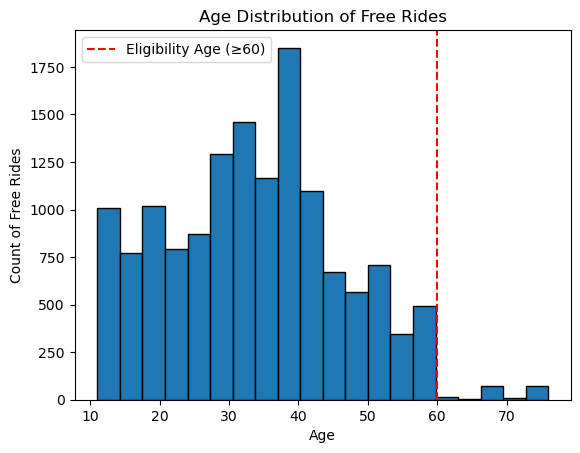

In [19]:
import matplotlib.pyplot as plt

# Plot age distribution of free rides
plt.hist(df[df['payAmount'] == 0]['payCardAge'], bins=20, edgecolor='black')
plt.axvline(60, color='red', linestyle='--', label='Eligibility Age (≥60)')
plt.xlabel('Age')
plt.ylabel('Count of Free Rides')
plt.title('Age Distribution of Free Rides')
plt.legend()
plt.show()

because of the graph above, we can see that free fare was also applied in different age group. So I googled and I found out that:
1. Elderly (60 years and above) with Jakarta Identity Card (KTP);
2. People with disabilities with national KTP;
3. Members of the Veterans of the Republic of Indonesia with national KTP;
4. Raskin category who have a Prosperous Family Card with Jabodetabek KTP;
5. Residents holding KTP of the Seribu Islands;
6. Mosque administrators (marbot) with Jakarta KTP and have a Decree of the Indonesian Mosque Council (DMI) for the current year;
7. Educators and education personnel in Early Childhood Education (PAUD) with National KTP and have a teaching decree for Jakarta for the current year;
8. Larvae Monitoring Officers (Jumantik) with Jakarta KTP and have a Jumantik Decree for the current year;
9. TNI and Polri with National KTP and KTA.

can get free fare, so free is reasonable

source: https://smartcity.jakarta.go.id/id/blog/cara-mendapatkan-kartu-layanan-gratis-transjakarta/

# 14. Drop Row (distance_km is 0)

In [20]:
rows_before = len(df)
print(f"Rows before dropping 0km distances: {rows_before}")

# Drop Rows Where distance_km is 0
df = df[df['distance_km'] > 0]

rows_after = len(df)
print(f"Rows after dropping 0km distances: {rows_after}")

dropped_rows = rows_before - rows_after
print(f"Number of rows dropped: {dropped_rows}")

Rows before dropping 0km distances: 31730
Rows after dropping 0km distances: 31712
Number of rows dropped: 18


In [21]:
df['distance_km'].describe()

count    31712.000000
mean         2.778367
std          3.279149
min          0.012580
25%          0.764817
50%          1.725092
75%          3.375147
max         22.651520
Name: distance_km, dtype: float64

from minimum value, we can still found 0.012580 km which is impossible, the minimum distance between bus stop is 200 m. So, I will drop the value below 200 m. 

In [ ]:
# Get all unique values where distance_km < 0.2
unique_distances = df[df['distance_km'] < 0.2]['distance_km'].unique()
print("Unique values (distance_km < 0.2):", sorted(unique_distances))  # Sorted unique values

# Count the number of unique values where distance_km < 0.2
num_unique = df[df['distance_km'] < 0.2]['distance_km'].nunique()
print("Number of unique values (distance_km < 0.2):", num_unique)

# Get the total count of rows where distance_km < 0.2
total_invalid = (df['distance_km'] < 0.2).sum()
print("Total rows with distance_km < 0.2:", total_invalid)


Unique values (distance_km < 0.2): [0.012579893014398763, 0.017870647043135318, 0.01853927784387303, 0.031209408162685255, 0.031496128273890076, 0.03873631192286239, 0.04532789265438646, 0.04685835069876605, 0.05388887648897912, 0.05717814738649753, 0.058223965247915746, 0.060022827815430085, 0.06457827078316124, 0.06530818931513371, 0.06893597867791051, 0.0792924073314087, 0.07958971737414552, 0.07995019533017352, 0.08043930197797258, 0.08087656692704685, 0.08216388757991677, 0.08397568568349174, 0.0840805905499494, 0.08673908960810257, 0.08947806475072911, 0.08971040818102542, 0.09357259971223372, 0.09445470463381825, 0.09530046547374119, 0.09571212284469748, 0.09645915073927654, 0.1003311433532536, 0.10043896203615807, 0.10480326730940775, 0.10728305324614293, 0.10856109301669427, 0.10952615964625603, 0.11239391117241165, 0.11281555666196787, 0.11479598777592134, 0.11661061518215832, 0.11935027021408984, 0.12099517453605295, 0.12287536851440474, 0.12539292195911406, 0.12571766096424

In [33]:
rows_before = len(df)
print(f"Rows before dropping 0km distances: {rows_before}")

# Drop Rows Where distance_km is below 200m
df = df[df['distance_km'] > 0.2]

rows_after = len(df)
print(f"Rows after dropping 0km distances: {rows_after}")

dropped_rows = rows_before - rows_after
print(f"Number of rows dropped: {dropped_rows}")

Rows before dropping 0km distances: 31712
Rows after dropping 0km distances: 30800
Number of rows dropped: 912


# 13. Save CSV after cleaning & Feature Engineering

In [34]:
df.to_csv('C:/Users/Debi/Downloads/cleaned_transjakarta.csv', index=False)

# 14. Open the cleaned csv file

In [35]:
df = pd.read_csv('C:/Users/Debi/Downloads/cleaned_transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapDay,payCardAge,tapInHour,tapOutHour,travelDuration,distance_km
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.85715,12.0,2023-04-03 06:00:53,3500.0,Monday,15,5,6,39.150000,2.514901
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.81892,21.0,2023-04-03 06:40:01,3500.0,Monday,26,5,6,57.283333,2.019437
2,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93194,29.0,2023-04-03 06:28:16,3500.0,Monday,45,5,6,43.416667,1.456398
3,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.81143,15.0,2023-04-03 06:57:03,3500.0,Monday,41,6,6,39.466667,8.721936
4,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,Female,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,106.82059,6.0,2023-04-03 05:52:25,2000.0,Monday,30,5,5,44.400000,0.732289


# 14. Demographic Analysis
A. Sex

In [37]:
gender_df = df['payCardSex'].value_counts().reset_index(name='count')
gender_df

,payCardSex,count
0,Female,16394
1,Male,14406


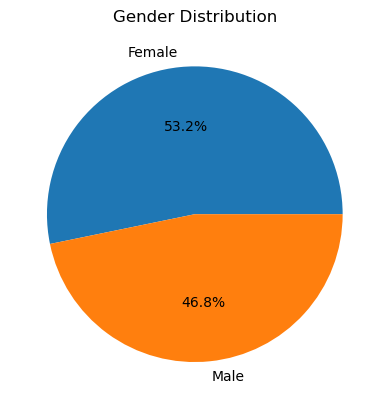

In [38]:
# Visualize with pie chart
plt.pie(gender_df['count'], labels=gender_df['payCardSex'],autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

B. Age Category

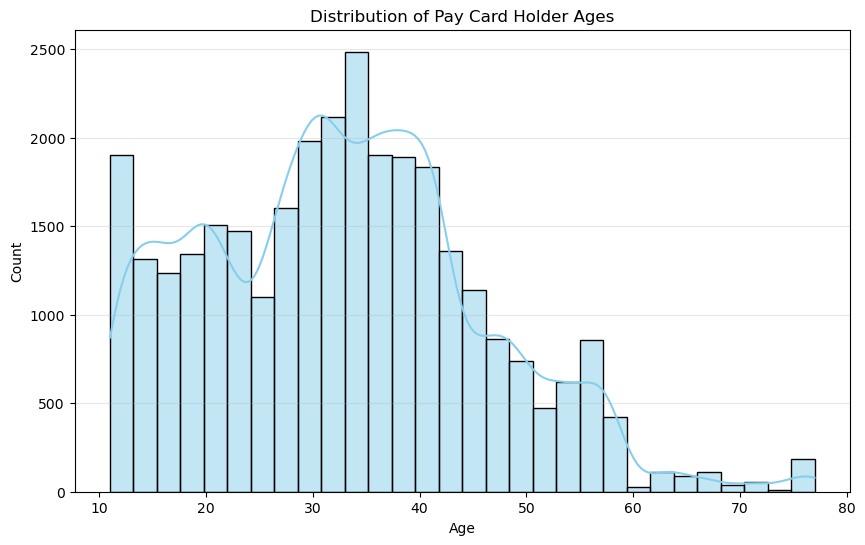

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['payCardAge'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Pay Card Holder Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 12. Payment Analysis
A. Pay Card/Bank 

C:\Users\Debi\AppData\Local\Temp\ipykernel_1040\669666731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bank_counts.values, y=bank_counts.index, palette='viridis')


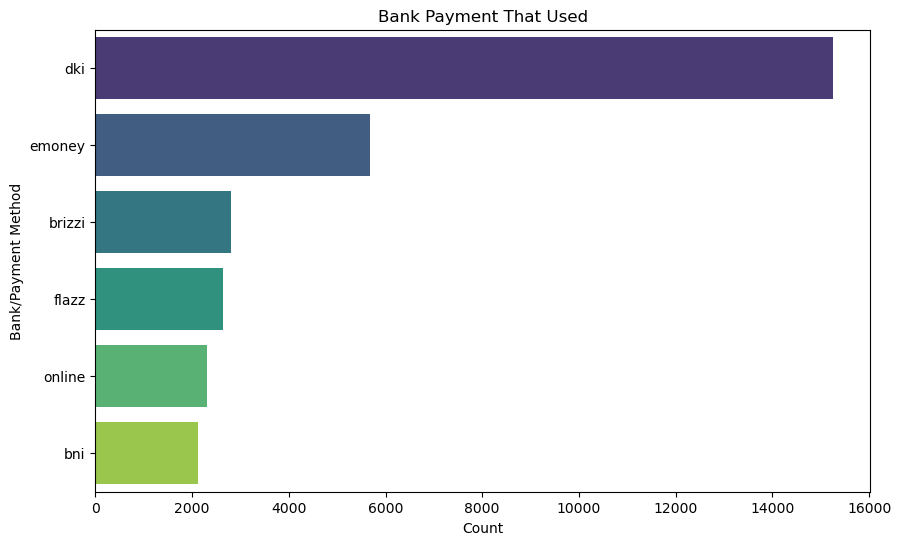

In [41]:
# frequency of each bank
bank_counts = df['payCardBank'].value_counts()

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=bank_counts.values, y=bank_counts.index, palette='viridis')
plt.title('Bank Payment That Used')
plt.xlabel('Count')
plt.ylabel('Bank/Payment Method')
plt.show()


B. Average Payment (based on Corridor)

In [54]:
# Create combined table
fare_tiers = pd.concat([
    zero_fare.assign(fare_tier='0 IDR'),
    two_thousand_fare.assign(fare_tier='2000 IDR'),
    three_five_thousand_fare.assign(fare_tier='3500 IDR')
])

# Pivot for cleaner presentation
pivoted = (fare_tiers
           .pivot_table(index='fare_tier', 
                       values='corridorID', 
                       aggfunc=list)
           .reset_index())

# Style the output
(pivoted.style
    .set_caption('Corridors by Fare Tier')
    .set_properties(**{
        'background-color': '#f7f7f7',  
        'color': 'black',              
        'border': '3px solid #abc',    
    })
    .hide(axis='index'))

fare_tier,corridorID
0 IDR,"['10A', '10B', '11B', '11C', '11K', '11M', '11N', '11P', '12C', '12F', '2E', '2F', '2H', '3A', '3B', '3C', '4E', '9F', 'BW9', 'JAK.01', 'JAK.02', 'JAK.03', 'JAK.04', 'JAK.05', 'JAK.06', 'JAK.07', 'JAK.08', 'JAK.10', 'JAK.106', 'JAK.11', 'JAK.110A', 'JAK.112', 'JAK.113', 'JAK.115', 'JAK.117', 'JAK.118', 'JAK.12', 'JAK.120', 'JAK.13', 'JAK.14', 'JAK.15', 'JAK.16', 'JAK.17', 'JAK.18', 'JAK.19', 'JAK.20', 'JAK.21', 'JAK.22', 'JAK.23', 'JAK.24', 'JAK.25', 'JAK.26', 'JAK.27', 'JAK.28', 'JAK.29', 'JAK.30', 'JAK.31', 'JAK.32', 'JAK.33', 'JAK.34', 'JAK.35', 'JAK.36', 'JAK.37', 'JAK.38', 'JAK.39', 'JAK.40', 'JAK.41', 'JAK.42', 'JAK.43B', 'JAK.43C', 'JAK.44', 'JAK.45', 'JAK.46', 'JAK.47', 'JAK.49', 'JAK.50', 'JAK.51', 'JAK.52', 'JAK.53', 'JAK.54', 'JAK.56', 'JAK.58', 'JAK.59', 'JAK.60', 'JAK.61', 'JAK.64', 'JAK.71', 'JAK.72', 'JAK.73', 'JAK.74', 'JAK.75', 'JAK.77', 'JAK.80', 'JAK.84', 'JAK.85', 'JAK.86', 'JAK.88', 'JAK.99']"
2000 IDR,"['1K', '1T', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S31', 'T21']"
3500 IDR,"['1', '10', '10D', '10H', '10K', '11', '11D', '11Q', '12', '12A', '12B', '12H', '12P', '13', '13B', '13C', '13D', '14', '1A', '1B', '1C', '1E', '1F', '1H', '1M', '1N', '1P', '1Q', '1R', '2', '2A', '2B', '2P', '2Q', '3', '3E', '3F', '4', '4B', '4C', '4D', '4F', '5', '5B', '5C', '5D', '5F', '5M', '5N', '6', '6A', '6B', '6C', '6D', '6H', '6M', '6N', '6Q', '6T', '6U', '6V', '7', '7A', '7B', '7C', '7D', '7E', '7F', '7P', '7Q', '8', '8A', '8C', '8D', '8E', '8K', '8M', '9', '9A', '9C', '9D', '9E', '9H', '9N', 'B11', 'B21', 'D11', 'D21', 'JIS3', 'L13E', 'M1', 'M10', 'M11', 'M12', 'M13', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'R1A', 'S11', 'S21', 'S22', 'T11']"


C. Average Payment (Based on Day)

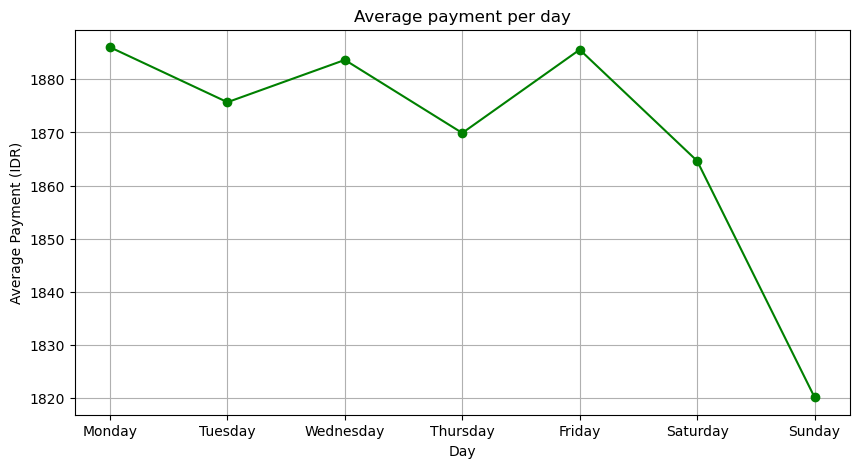

In [ ]:
# Group by day & count the average
avg_pay_per_day = df.groupby('tapDay')['payAmount'].mean()

#sorting days
# Sort days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_pay_per_day = avg_pay_per_day.reindex(days_order)

# Visualization
plt.figure(figsize=(10,5))
avg_pay_per_day.plot(kind='line', marker='o', color='green')
plt.title('Average payment per day')
plt.xlabel('Day')
plt.ylabel('Average Payment (IDR)')
plt.grid(True)
plt.show()

# 13. Corridor, Distance and Hotspot
A. Which Corridor that the most used?

C:\Users\Debi\AppData\Local\Temp\ipykernel_1040\2926352604.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='count', y='corridorID', data=corridor_usage, palette='viridis')
C:\Users\Debi\AppData\Local\Temp\ipykernel_1040\2926352604.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


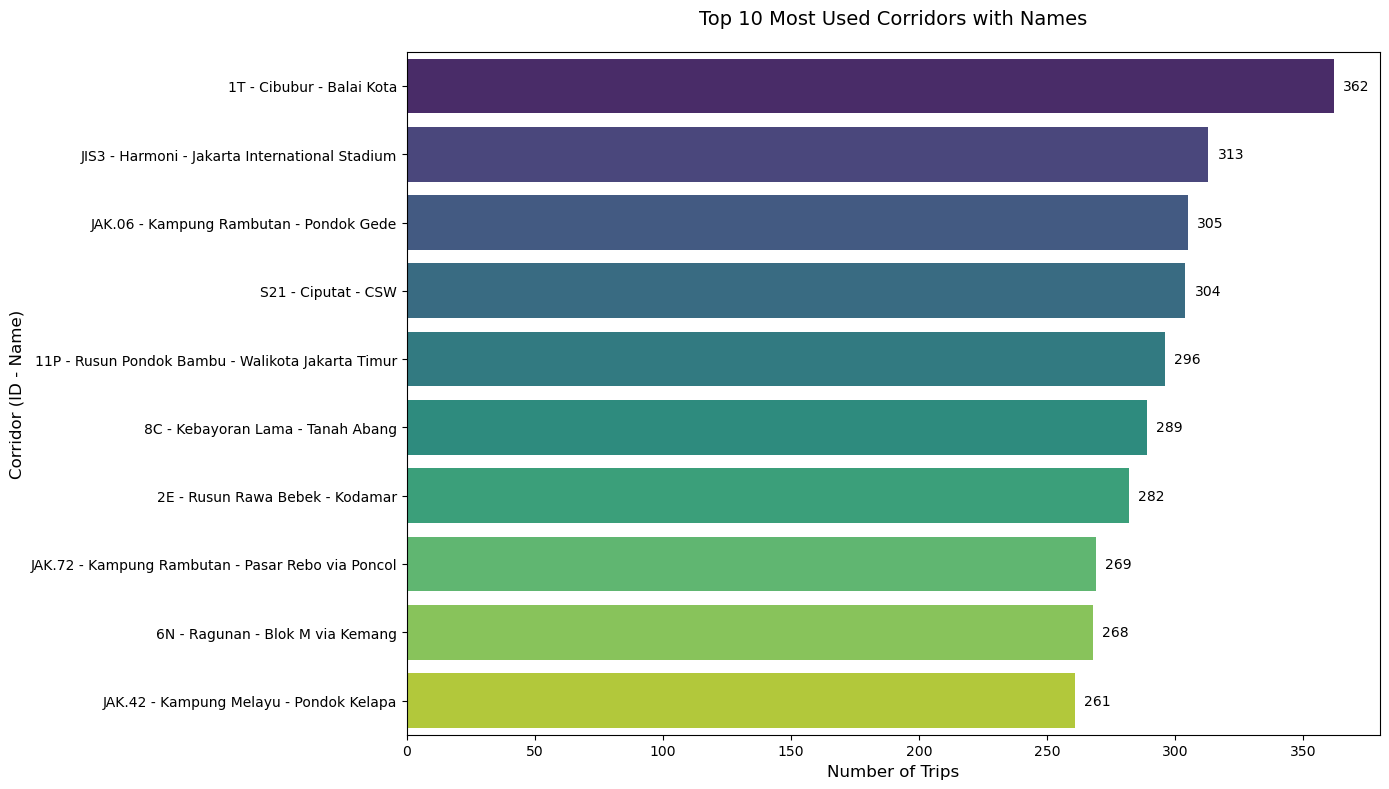

In [87]:
# Get top 10 corridors with their names
corridor_usage = df.groupby(['corridorID', 'corridorName']).size().reset_index(name='count')
corridor_usage = corridor_usage.sort_values('count', ascending=False).head(10)

# Create the visualization
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='count', y='corridorID', data=corridor_usage, palette='viridis')

# Create combined labels with ID and Name
y_labels = [f"{row['corridorID']} - {row['corridorName']}" for _, row in corridor_usage.iterrows()]
ax.set_yticklabels(y_labels)

plt.title('Top 10 Most Used Corridors with Names', fontsize=14, pad=20)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Corridor (ID - Name)', fontsize=12)

# Add value labels on bars
for i, v in enumerate(corridor_usage['count']):
    ax.text(v + max(corridor_usage['count'])*0.01, i, f"{v:,}", color='black', va='center')

plt.tight_layout()
plt.show()


B. Average passengers per day for 10 top corridors?

In [94]:
# Calculate average daily passengers per corridor
daily_avg = df.groupby(['corridorID', 'tapDay']).size().groupby('corridorID').mean().sort_values(ascending=False)

# Convert to DataFrame for better display
avg_table = daily_avg.reset_index()
avg_table.columns = ['corridorID', 'Average Daily Passengers']
avg_table['Average Daily Passengers'] = avg_table['Average Daily Passengers'].round(1)

# Display as styled table
(avg_table.head(10).style
    .set_caption('Top 10 Corridors by Average Daily Passengers')
    .set_properties(**{
        'background-color': '#f8f9fa',
        'border': '1px solid #ddd',
        'color': 'black'
    })
    .format({'Average Daily Passengers': '{:.1f}'})
    .hide(axis='index')
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#343a40'), 
                 ('color', 'white'),
                 ('font-weight', 'bold')]
    }]))

# Merge with corridor names
corridor_names = df[['corridorID', 'corridorName']].drop_duplicates()
avg_table = avg_table.merge(corridor_names, on='corridorID')

# Reorder columns and display
(avg_table[['corridorID', 'corridorName', 'Average Daily Passengers']]
 .head(10)
 .style
    .set_caption('Top 10 Corridors by Average Daily Passengers')
    .set_properties(**{'text-align': 'left'})
    .format({'Average Daily Passengers': '{:.1f}'}))


,corridorID,corridorName,Average Daily Passengers
0,1T,Cibubur - Balai Kota,51.7
1,JIS3,Harmoni - Jakarta International Stadium,44.7
2,JAK.06,Kampung Rambutan - Pondok Gede,43.6
3,S21,Ciputat - CSW,43.4
4,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,42.3
5,8C,Kebayoran Lama - Tanah Abang,41.3
6,2E,Rusun Rawa Bebek - Kodamar,40.3
7,JAK.72,Kampung Rambutan - Pasar Rebo via Poncol,38.4
8,6N,Ragunan - Blok M via Kemang,38.3
9,JAK.42,Kampung Melayu - Pondok Kelapa,37.3


C. Which Corridor that the least used?

C:\Users\Debi\AppData\Local\Temp\ipykernel_1040\1930750859.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='count', y='corridorID', data=corridor_usage, palette='viridis')
C:\Users\Debi\AppData\Local\Temp\ipykernel_1040\1930750859.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


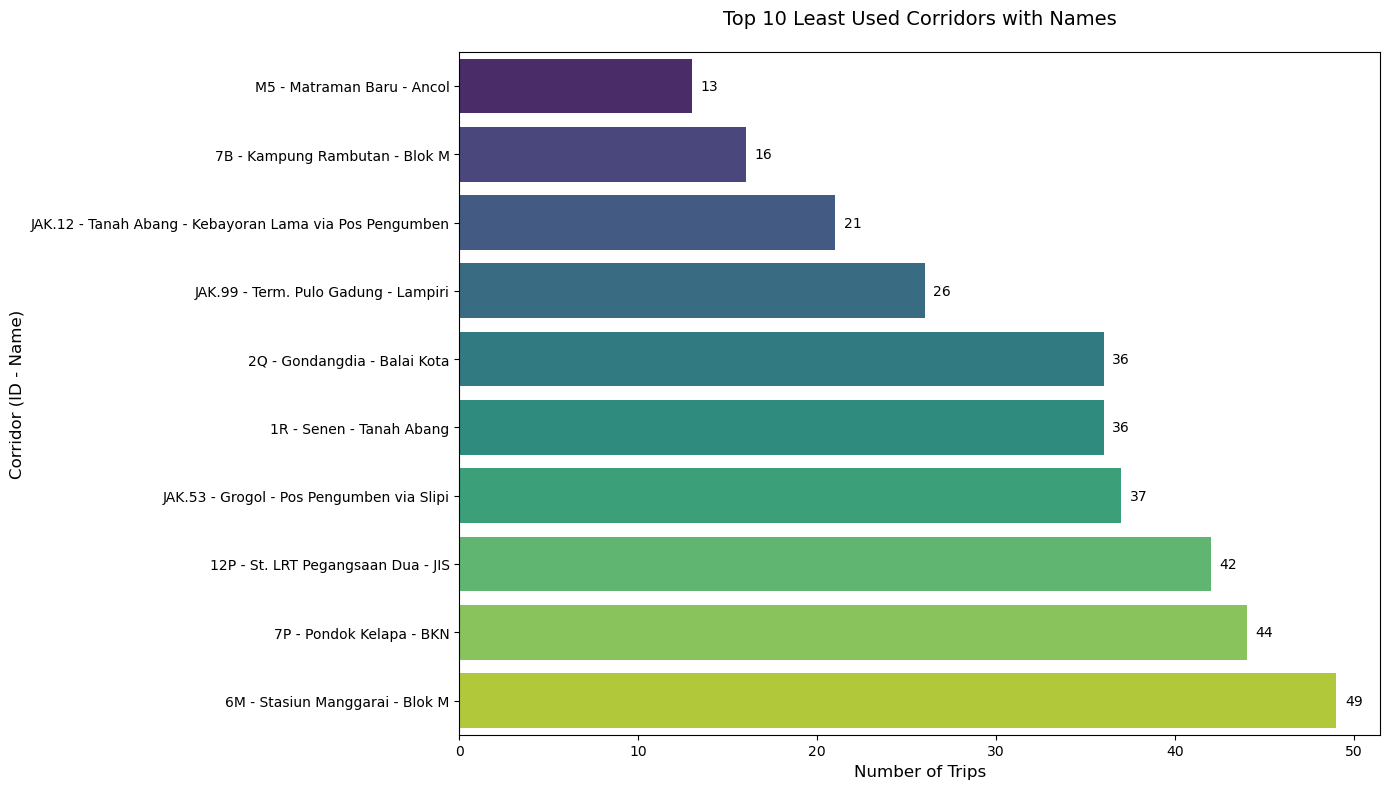

In [95]:
# Get bottom 10 corridors with their names
corridor_usage = df.groupby(['corridorID', 'corridorName']).size().reset_index(name='count')
corridor_usage = corridor_usage.sort_values('count', ascending=True).head(10)

# Create the visualization
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='count', y='corridorID', data=corridor_usage, palette='viridis')

# Create combined labels with ID and Name
y_labels = [f"{row['corridorID']} - {row['corridorName']}" for _, row in corridor_usage.iterrows()]
ax.set_yticklabels(y_labels)

plt.title('Top 10 Least Used Corridors with Names', fontsize=14, pad=20)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Corridor (ID - Name)', fontsize=12)

# Add value labels on bars
for i, v in enumerate(corridor_usage['count']):
    ax.text(v + max(corridor_usage['count'])*0.01, i, f"{v:,}", color='black', va='center')

plt.tight_layout()
plt.show()

D. Average passengers per day for 10 bottom corridors?

In [97]:
# Calculate average daily passengers per corridor
daily_avg = df.groupby(['corridorID', 'tapDay']).size().groupby('corridorID').mean().sort_values(ascending=True)

# Convert to DataFrame for better display
avg_table = daily_avg.reset_index()
avg_table.columns = ['corridorID', 'Average Daily Passengers']
avg_table['Average Daily Passengers'] = avg_table['Average Daily Passengers'].round(1)

# Display as styled table
(avg_table.head(10).style
    .set_caption('Bottom 10 Corridors by Average Daily Passengers')
    .set_properties(**{
        'background-color': '#f8f9fa',
        'border': '1px solid #ddd',
        'color': 'black'
    })
    .format({'Average Daily Passengers': '{:.1f}'})
    .hide(axis='index')
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#343a40'), 
                 ('color', 'white'),
                 ('font-weight', 'bold')]
    }]))

# Merge with corridor names
corridor_names = df[['corridorID', 'corridorName']].drop_duplicates()
avg_table = avg_table.merge(corridor_names, on='corridorID')

# Reorder columns and display
(avg_table[['corridorID', 'corridorName', 'Average Daily Passengers']]
 .head(10)
 .style
    .set_caption('Top 10 Corridors by Average Daily Passengers')
    .set_properties(**{'text-align': 'left'})
    .format({'Average Daily Passengers': '{:.1f}'}))

,corridorID,corridorName,Average Daily Passengers
0,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,3.0
1,JAK.99,Term. Pulo Gadung - Lampiri,3.7
2,M5,Matraman Baru - Ancol,4.3
3,2Q,Gondangdia - Balai Kota,5.1
4,1R,Senen - Tanah Abang,5.1
5,JAK.53,Grogol - Pos Pengumben via Slipi,5.3
6,12P,St. LRT Pegangsaan Dua - JIS,6.0
7,7P,Pondok Kelapa - BKN,6.3
8,6M,Stasiun Manggarai - Blok M,7.0
9,11C,Rusun Pinus Elok - Rusun Pulo Gebang,7.1


E. Which corridor is the busiest based on day?

In [ ]:
# Calculate busiest corridor per day
busiest_per_day = df.groupby(['tapDay', 'corridorID']).size().groupby('tapDay').idxmax()

# Convert to DataFrame and extract corridorID
busiest_table = pd.DataFrame({
    'Day': busiest_per_day.index,
    'Busiest Corridor': [corridor_id for (day, corridor_id) in busiest_per_day.values]
})

# Add corridor names 
if 'corridorName' in df.columns:
    corridor_names = df[['corridorID', 'corridorName']].drop_duplicates().set_index('corridorID')
    busiest_table['Corridor Name'] = busiest_table['Busiest Corridor'].map(corridor_names['corridorName'])

# Order by days of week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
busiest_table['Day'] = pd.Categorical(busiest_table['Day'], categories=days_order, ordered=True)
busiest_table = busiest_table.sort_values('Day')

# Display as styled table
(busiest_table.style
    .set_caption('Busiest Corridor by Day of Week')
    .set_properties(**{
        'background-color': '#f8f9fa',
        'border': '1px solid #dee2e6',
        'color': '#212529'
    })
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#343a40'), 
                 ('color', 'white'),
                 ('font-weight', 'bold')]
    }, {
        'selector': 'tr:nth-child(even)',
        'props': [('background-color', '#f2f2f2')]
    }])
    .hide(axis='index'))

Day,Busiest Corridor,Corridor Name
Monday,1T,Cibubur - Balai Kota
Tuesday,1T,Cibubur - Balai Kota
Wednesday,1T,Cibubur - Balai Kota
Thursday,1T,Cibubur - Balai Kota
Friday,1T,Cibubur - Balai Kota
Saturday,9C,Pinang Ranti - Bundaran Senayan
Sunday,JAK.19,Pinang Ranti - Kampung Rambutan


F. Which corridor is the least busy based on day?

In [100]:
# Calculate least busy corridor per day
least_busy = df.groupby(['tapDay', 'corridorID']).size().groupby('tapDay').idxmin()

# Convert to DataFrame
least_busy_table = pd.DataFrame({
    'Day': [day for (day, corridor) in least_busy],
    'Corridor ID': [corridor for (day, corridor) in least_busy]
})

# Add corridor names if available
if 'corridorName' in df.columns:
    corridor_names = df[['corridorID', 'corridorName']].drop_duplicates().set_index('corridorID')
    least_busy_table['Corridor Name'] = least_busy_table['Corridor ID'].map(corridor_names['corridorName'])

# Order by days of week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
least_busy_table['Day'] = pd.Categorical(least_busy_table['Day'], categories=days_order, ordered=True)
least_busy_table = least_busy_table.sort_values('Day').reset_index(drop=True)

# Style the table
(least_busy_table.style
    .set_caption('Least Busy Corridors by Day of Week')
    .set_properties(**{
        'background-color': '#f8f9fa',
        'border': '1px solid #dee2e6',
        'color': '#212529'
    })
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#343a40'), 
                 ('color', 'white'),
                 ('font-weight', 'bold')]
    }, {
        'selector': 'tr:nth-child(even)',
        'props': [('background-color', '#f2f2f2')]
    }])
    .hide(axis='index'))


Day,Corridor ID,Corridor Name
Monday,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben
Tuesday,JAK.99,Term. Pulo Gadung - Lampiri
Wednesday,M5,Matraman Baru - Ancol
Thursday,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben
Friday,JAK.99,Term. Pulo Gadung - Lampiri
Saturday,JAK.17,Senen - Pulo Gadung
Sunday,B11,Summarecon Bekasi - BNN


G. What is the most used start point?

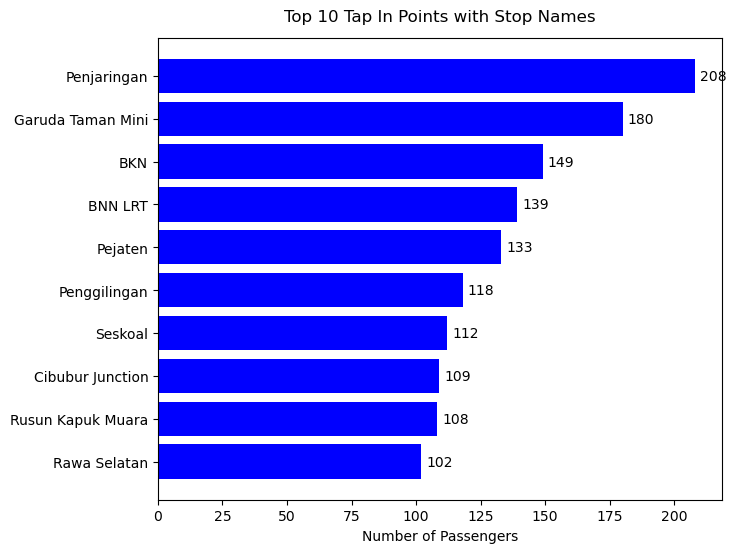

In [78]:
plt.figure(figsize=(16, 6))

# First subplot - Top 10 Tap In Points with Names
plt.subplot(1, 2, 1)
# Get top 10 tap in stops with their names
top_tap_in = df.groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='count')
top_tap_in = top_tap_in.sort_values('count', ascending=False).head(10)

# Plot with stop names
bars = plt.barh(range(len(top_tap_in)), top_tap_in['count'], color='blue')
plt.yticks(range(len(top_tap_in)), top_tap_in['tapInStopsName'])
plt.title('Top 10 Tap In Points with Stop Names', pad=12)
plt.xlabel('Number of Passengers')
plt.gca().invert_yaxis()  # Highest count at top

# Add count labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + max(top_tap_in['count'])*0.01, i, 
             f'{width:,}', 
             va='center')


H. What is the most used end point?

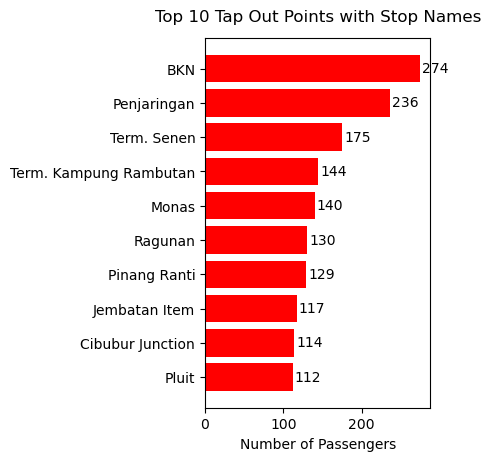

In [86]:
plt.subplot(1, 2, 2)
# Get top 10 tap out stops with their names
top_tap_out = df.groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='count')
top_tap_out = top_tap_out.sort_values('count', ascending=False).head(10)

# Plot with stop names
bars = plt.barh(range(len(top_tap_out)), top_tap_out['count'], color='red')
plt.yticks(range(len(top_tap_out)), top_tap_out['tapOutStopsName'])
plt.title('Top 10 Tap Out Points with Stop Names', pad=12)
plt.xlabel('Number of Passengers')
plt.gca().invert_yaxis()  # Highest count at top

# Add count labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + max(top_tap_out['count'])*0.01, i, 
             f'{width:,}', 
             va='center')

plt.show()

I. How many stops, duration and distance does an average user take?

In [104]:
df['stops_traveled'] = df['stopEndSeq'] - df['stopStartSeq'] 
print("\nAverage stops average user take:", df['stops_traveled'].mean())

print("\nAverage duration user take:", df['travelDuration'].mean())

print("\nAverage Distance user take:", df['distance_km'].mean())


Average stops average user take: 7.882045454545454

Average duration user take: 72.19901298701299

Average Distance user take: 2.85652671124316


J. What is the busiest time?

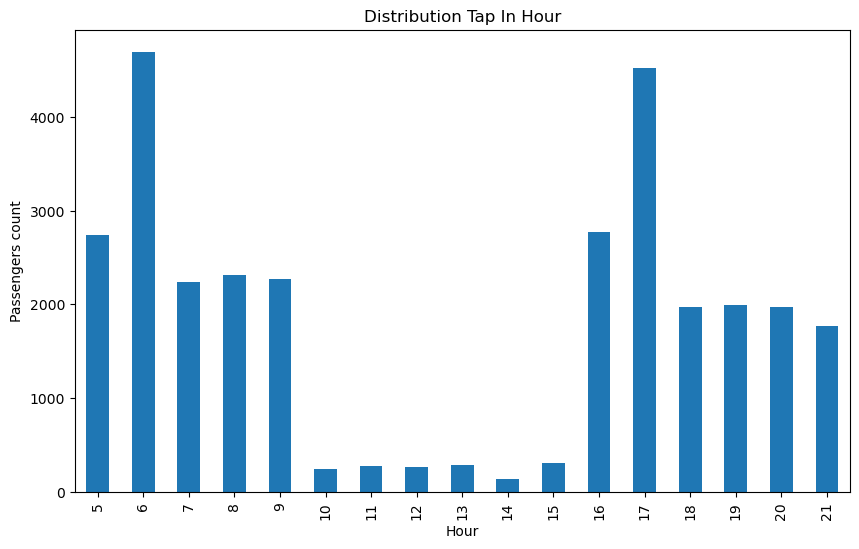

In [105]:
plt.figure(figsize=(10,6))
df['tapInHour'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution Tap In Hour')
plt.xlabel('Hour')
plt.ylabel('Passengers count')
plt.show()


# 14. Bivariate & Multivariate Analysis
A. Is there a difference in route traffic on weekdays and weekends?


C:\Users\Debi\AppData\Local\Temp\ipykernel_1040\1131967687.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


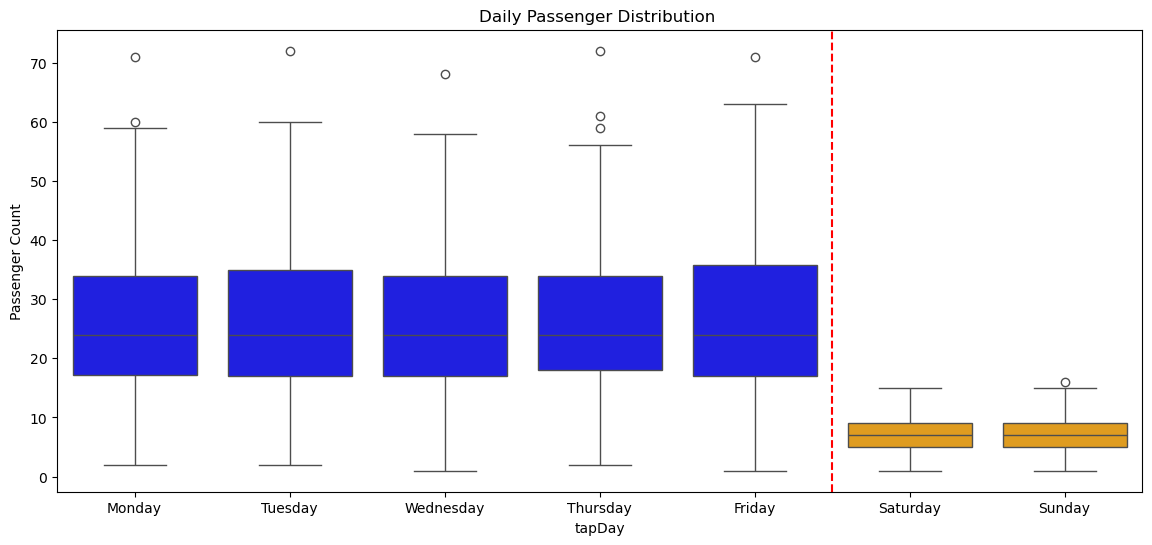

In [117]:
# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Categorized into weekday & weekend:
df['day_type'] = np.where(df['tapDay'].isin(weekdays), 'Weekday', 'Weekend')

# Traffic comparison
traffic_comparison = df.groupby(['corridorID', 'day_type']).size().unstack()
traffic_comparison['difference'] = traffic_comparison['Weekday'] - traffic_comparison['Weekend']

# Visualization
plt.figure(figsize=(14,6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(
    x='tapDay',
    y='count',
    data=df.groupby(['corridorID', 'tapDay']).size().reset_index(name='count'),
    order=day_order,
    palette=['blue']*5 + ['orange']*2  # Weekdays in blue, weekends in orange
)
plt.title('Daily Passenger Distribution ')
plt.ylabel('Passenger Count')
plt.axvline(4.5, color='red', linestyle='--')  # Line separating weekdays and weekends
plt.show()

B. Is there a difference in the busiest times on weekdays and weekends?


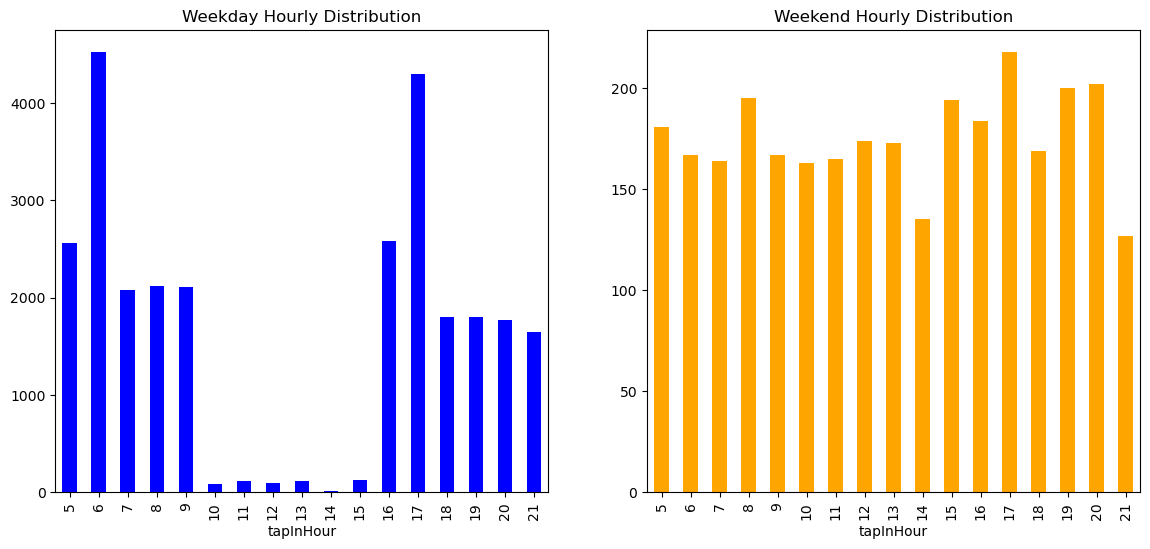

In [119]:

# Make Heatmap
weekday_hours = df[df['day_type']=='Weekday'].groupby('tapInHour').size()
weekend_hours = df[df['day_type']=='Weekend'].groupby('tapInHour').size()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
weekday_hours.plot(kind='bar', color='blue')
plt.title('Weekday Hourly Distribution')

plt.subplot(1,2,2)
weekend_hours.plot(kind='bar', color='orange')
plt.title('Weekend Hourly Distribution')
plt.show()

C. Is there a relationship between age group and payment method?


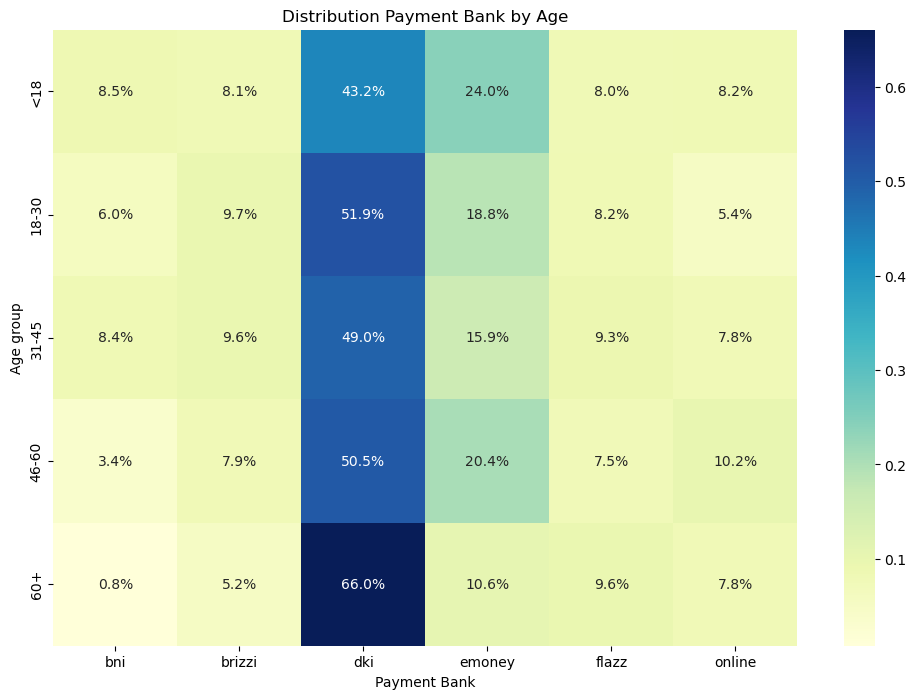

In [109]:
# Buat kelompok usia
df['age_group'] = pd.cut(df['payCardAge'], 
                         bins=[0, 17, 30, 45, 60, 100],
                         labels=['<18', '18-30', '31-45', '46-60', '60+'])

# Cross-tabulation
payment_age = pd.crosstab(df['age_group'], df['payCardBank'], normalize='index')

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(payment_age, annot=True, fmt='.1%', cmap='YlGnBu')
plt.title('Distribution Payment Bank by Age')
plt.ylabel('Age group')
plt.xlabel('Payment Bank')
plt.show()

D. Is there a relationship between payment method and transaction time?

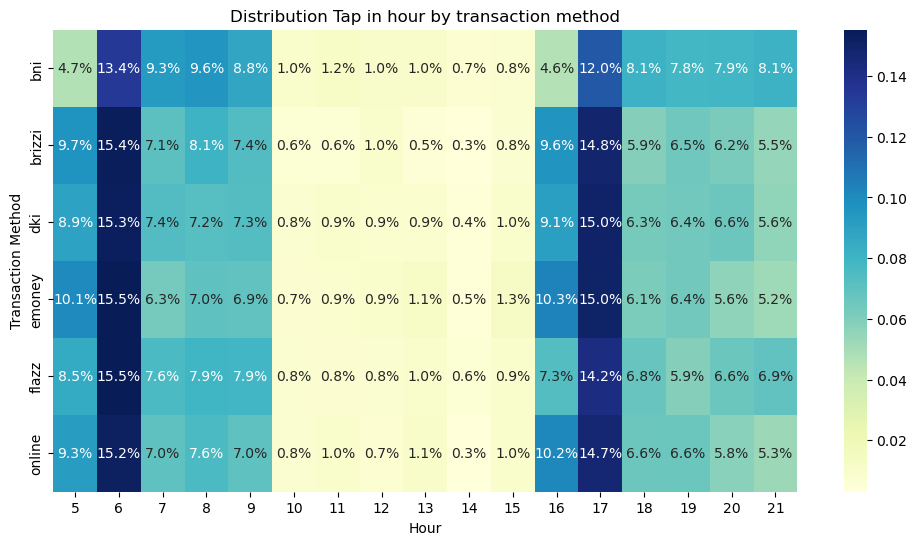

In [120]:
# Visualisasi heatmap
plt.figure(figsize=(12,6))
payment_hour = pd.crosstab(df['payCardBank'], df['tapInHour'], normalize='index')
sns.heatmap(payment_hour, cmap='YlGnBu', annot=True, fmt='.1%')
plt.title('Distribution Tap in hour by transaction method')
plt.ylabel('Transaction Method')
plt.xlabel('Hour')
plt.show()

E. Is there a relationship between gender and time?

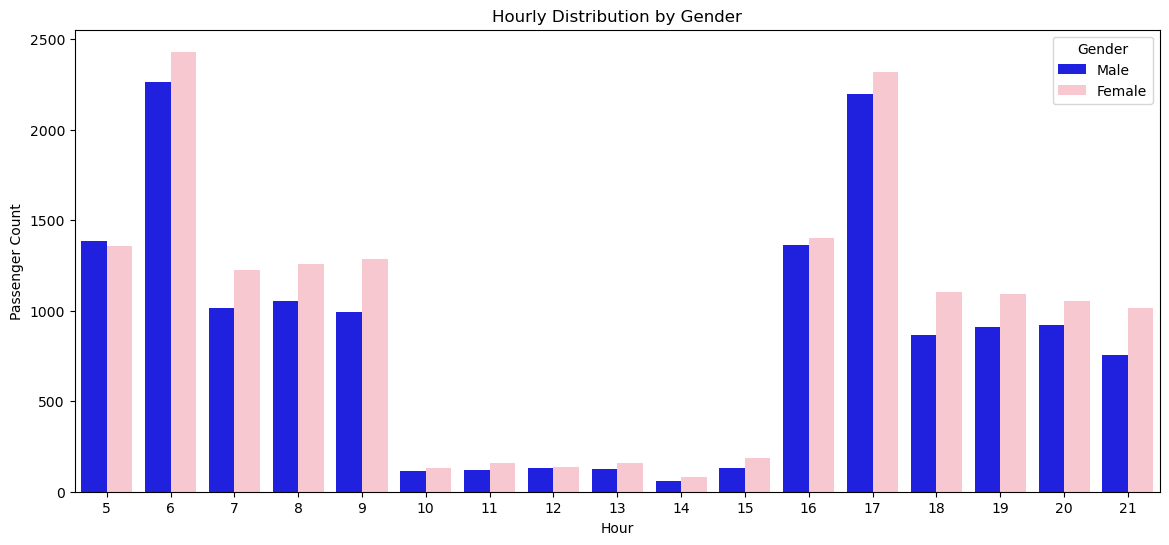

In [122]:
plt.figure(figsize=(14,6))
sns.countplot(x='tapInHour', hue='payCardSex', data=df, 
              palette={'Male':'blue', 'Female':'pink'})
plt.title('Hourly Distribution by Gender')
plt.xlabel('Hour')
plt.ylabel('Passenger Count')
plt.legend(title='Gender')
plt.show()